In [1]:
import pandas as pd

messages = pd.read_csv('datasets/P6_P7_spam.csv', encoding='latin-1')
messages.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)
messages = messages.rename(columns={'v1': 'class','v2': 'text'})

In [2]:
messages.head()
messages.groupby('class').describe()

text                                                               
      count unique                                                top freq
class                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [3]:
messages['length'] = messages['text'].apply(len)
messages.head()

,class,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001541099BC88>]],
      dtype=object)

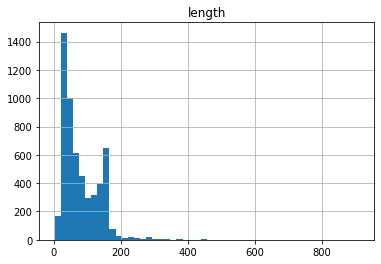

In [7]:
import matplotlib.pyplot as plt
messages.hist(column='length', bins=50,)

In [8]:
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def process_text(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean_words

In [9]:
messages['text'].apply(process_text)

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [2nd, time, tried, 2, contact, u, U, å£750, Po...
5568                   [Ì, b, going, esplanade, fr, home]
5569                     [Pity, mood, Soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [Rofl, true, name]
Name: text, Length: 5572, dtype: object

In [10]:
from sklearn.model_selection import train_test_split
msg_train, msg_test, class_train, class_test = train_test_split(messages['text'], messages['class'], test_size=0.2)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

bow_transformer = CountVectorizer(analyzer=process_text).fit(msg_train)
tfidf_transformer = TfidfTransformer(use_idf = False)

messages_bow_train = bow_transformer.transform(msg_train)
messages_tfidf_train = tfidf_transformer.transform(messages_bow_train)

messages_bow_test = bow_transformer.transform(msg_test)
messages_tfidf_test = tfidf_transformer.transform(messages_bow_test)

In [21]:
from sklearn.svm import LinearSVC

model1 = LinearSVC()
model1.fit(messages_tfidf_train, class_train)
result1 = model1.predict(messages_tfidf_test)

In [26]:
from sklearn.svm import SVC

model2 = SVC()
model2.fit(messages_tfidf_train, class_train)
result2 = model2.predict(messages_tfidf_test)

d:\gul main folder\are we college of engineering\study\7 sem\dse\lab\lab_env\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [29]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(classification_report(class_test, result1))
print(classification_report(class_test, result2))

print(confusion_matrix(class_test, result1))
print(confusion_matrix(class_test, result2))

print(accuracy_score(class_test, result1))
print(accuracy_score(class_test, result2))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       978
        spam       0.98      0.88      0.93       137

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

              precision    recall  f1-score   support

         ham       0.88      1.00      0.93       978
        spam       0.00      0.00      0.00       137

    accuracy                           0.88      1115
   macro avg       0.44      0.50      0.47      1115
weighted avg       0.77      0.88      0.82      1115

[[976   2]
 [ 16 121]]
[[978   0]
 [137   0]]
0.9838565022421525
0.8771300448430494
